In [3]:
import seaborn as sns
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
%pylab inline
import os
from __future__ import print_function
from __future__ import division
import os, sys
# hook up all scripts
sys.path.append(os.path.abspath('../scripts')) # if notebook in folder
sys.path.append(os.path.abspath('./scripts')) #if in root
sys.path.append(os.path.abspath('.')) #for current preprocessing
# %load_ext autoreload
# %autoreload 2 # changes in script will be immediately applied

import preprocessing_all_data_v03_2 as pad


os.chdir(pad.working_dir())

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# Вызов генерации фич

In [4]:
# перечислил все категории, по которым можно сплитовать

categorical_hierahies = [['State', 'Town', u'Agencia_ID'],
                         [ u'Canal_ID'],
                         [u'Ruta_SAK'], 
                         [u'Cliente_ID'], 
                         ['brand', u'Producto_ID']]

In [5]:
reload(pad)
pad.OUT_FEATURES = np.unique(pd.read_csv(pad.working_dir()+'Feature_releases/important_features_v03.tsv', header = None)[0].tolist() + \
                             ['Log_Demanda'] + \
                            pad.INDEXERS)
out_dir = pad.working_dir() + 'Feature_releases/release_v03/'
data = pad.preproc(states=['QUERETARO'])
data.head()

file was splitted into 6 parts by product
1 parts of lags were calculated
2 parts of lags were calculated
3 parts of lags were calculated
4 parts of lags were calculated
5 parts of lags were calculated
6 parts of lags were calculated


,Agencia_ID,Canal_ID,Cliente_ID,Demanda_uni_equil_1,Demanda_uni_equil_2,Demanda_uni_equil_3,Demanda_uni_equil_4mean_1,Log_Demanda,Log_Demanda_3mean_1,Log_Demanda_3mean_2,...,Venta_hoy_4mean_1,Venta_hoy_by_uni_1,Venta_hoy_by_uni_3,Venta_hoy_by_uni_3mean_1,Venta_uni_hoy_1,Venta_uni_hoy_3mean_1,Venta_uni_hoy_3mean_2,brand,pieces,weight
0,2059,7,237195,NaN,NaN,NaN,NaN,2.197225,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,12.0,976.0
1,2059,7,237195,NaN,NaN,NaN,NaN,1.098612,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,8.0,340.0
5,2059,7,240250,NaN,NaN,NaN,NaN,1.098612,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,12.0,976.0
13,2059,7,249114,NaN,NaN,NaN,NaN,4.304065,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,12.0,976.0
14,2059,7,582091,NaN,NaN,NaN,NaN,2.397895,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,12.0,976.0


In [6]:
cur_week_features = [u'Town', u'State', u'Venta_uni_hoy', u'Venta_hoy', u'Dev_uni_proxima',
       u'Dev_proxima', u'Demanda_uni_equil', u'Dev_proxima_by_uni', u'No_remains', 
        u'Venta_hoy_by_uni', u'Ordered', 'Log_Dev_proxima', 'Log_Dev_uni_proxima', 'Log_Venta_hoy']
cur_week_features = [x for x in cur_week_features if x in data.columns]
means_by_split = [x for x in data.columns if '_Mean_' in x and x[-2] != '_'] #its mean, its not a lag
cur_week_widelags = [x for x in data.columns if 'mean' in x and x[-2] != '_'] #its mean, its not a lag
data_for_model = data.drop(cur_week_features + means_by_split + cur_week_widelags, axis=1).set_index(u'Semana')
print('Drop', str(cur_week_features+ means_by_split + cur_week_widelags))

X_train = data_for_model.loc[list(range(3,8)),:].drop('Log_Demanda', axis=1)
y_train = data_for_model.loc[list(range(3,8)),:]['Log_Demanda']
X_test = data_for_model.loc[list(range(8,10)),:].drop('Log_Demanda', axis=1)
y_test = data_for_model.loc[list(range(8,10)),:]['Log_Demanda']
X_train.head()

Drop []


,Agencia_ID,Canal_ID,Cliente_ID,Demanda_uni_equil_1,Demanda_uni_equil_2,Demanda_uni_equil_3,Demanda_uni_equil_4mean_1,Log_Demanda_3mean_1,Log_Demanda_3mean_2,Log_Demanda_4mean_1,...,Venta_hoy_4mean_1,Venta_hoy_by_uni_1,Venta_hoy_by_uni_3,Venta_hoy_by_uni_3mean_1,Venta_uni_hoy_1,Venta_uni_hoy_3mean_1,Venta_uni_hoy_3mean_2,brand,pieces,weight
Semana,,,,,,,,,,,,,,,,,,,,,
3,2059,7,237195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,12.0,976.0
3,2059,7,237195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,8.0,340.0
3,2059,7,240250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,12.0,976.0
3,2059,7,249114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,12.0,976.0
3,2059,7,582091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,12.0,976.0


In [7]:
features_1_lag = [x for x in X_train.columns if x[-2:] == '_1']
X_train2 = X_train.drop(features_1_lag, axis=1)
X_test2 = X_test.drop(features_1_lag, axis=1)
X_train2.shape, X_train.shape

((212341, 29), (212341, 50))

In [8]:
X_eval = data_for_model.loc[list(range(10,12)),:].drop('Log_Demanda', axis=1)
X_eval2 = X_eval.drop(features_1_lag, axis=1)

In [9]:
(~X_test.isnull()).sum().sort_values()

Venta_hoy_by_uni_3                                                         49820
No_remains_Mean_Cliente_ID_Canal_ID_Agencia_ID_Ruta_SAK_3                  49870
Venta_hoy_3mean_3                                                          49870
Log_Demanda_Mean_brand_Cliente_ID_Ruta_SAK_Agencia_ID_3                    49870
Demanda_uni_equil_3                                                        49870
Log_Demanda_Mean_Producto_ID_Cliente_ID_Canal_ID_Agencia_ID_Ruta_SAK_3     49870
Venta_hoy_3                                                                49870
Log_Demanda_Mean_Producto_ID_Cliente_ID_Canal_ID_Agencia_ID_3              49870
Log_Demanda_Mean_Producto_ID_Canal_ID_Agencia_ID_Ruta_SAK_3                49870
Log_Demanda_Mean_Cliente_ID_Canal_ID_Agencia_ID_Ruta_SAK_3                 49870
No_remains_Mean_Cliente_ID_Canal_ID_Agencia_ID_Ruta_SAK_2                  52530
Log_Demanda_Mean_brand_Cliente_ID_Ruta_SAK_Agencia_ID_2                    52530
Log_Demanda_Mean_Producto_ID

# xgboost

In [10]:
import xgboost as xgb
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error

# param = clf.best_params_
param = {
 'learning_rate': 0.3,
 'gamma': 1,
 'max_depth': 16,
 'min_child_weight': 18,
 'n_estimators': 50,
 'subsample': 0.8,
 'colsample_bytree': 0.8,
 'nthread':-1
}

xgb_model = xgb.XGBRegressor()
xgb_model.set_params(**param)

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=1, learning_rate=0.3, max_delta_step=0, max_depth=16,
       min_child_weight=18, missing=None, n_estimators=50, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8)

In [11]:
# param = clf.best_params_
param = {
 'learning_rate': 0.3,
 'gamma': 1,
 'max_depth': 16,
 'min_child_weight': 18,
 'n_estimators': 50,
 'subsample': 0.8,
 'colsample_bytree': 0.8,
 'nthread':-1
}

xgb_model2 = xgb.XGBRegressor()
xgb_model2.set_params(**param)

xgb_model2.fit(X_train2, y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=1, learning_rate=0.3, max_delta_step=0, max_depth=16,
       min_child_weight=18, missing=None, n_estimators=50, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8)

Train: 0.373992010747
Test whole set: 0.397037905721
Test 8 week: 0.368836650672
Test 9 week: 0.425766645545


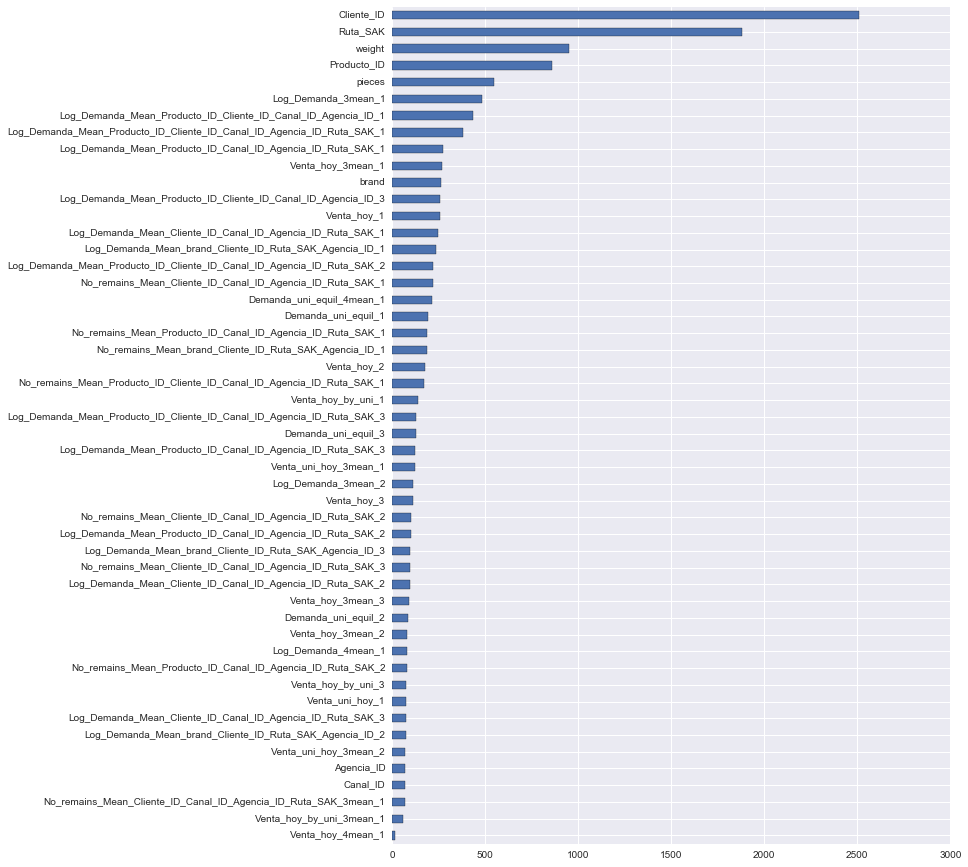

In [12]:
feat_imp = xgb_model.booster().get_fscore()
for col in X_train:
    if col not in feat_imp:
        feat_imp[col] = 0
        
feat_imp = pd.Series(feat_imp).sort_values()
feat_imp.tail(100).plot.barh(figsize=(10,15))

print('Train:', np.sqrt(mean_squared_error(y_train, xgb_model.predict(X_train))))
preds = pd.Series(xgb_model.predict(X_test.loc[8]), index=X_test.loc[8])
preds2 = pd.Series(xgb_model2.predict(X_test2.loc[9]), index=X_test2.loc[9])
print('Test whole set:', np.sqrt(mean_squared_error(y_test.loc[[8,9]], np.concatenate([preds, preds2]))))
print('Test 8 week:', np.sqrt(mean_squared_error(y_test.loc[8], preds)))
print('Test 9 week:', np.sqrt(mean_squared_error(y_test.loc[9], preds2)))

In [13]:
def rmse(fact, pred):
    diff = np.subtract(fact, pred) ** 2
    return np.sqrt(diff.mean())

rmse(y_test.loc[8].values, preds.values)

0.36883665067207511

8 week with new Client: 0.546858961405
8 week with old Client: 0.366948632322


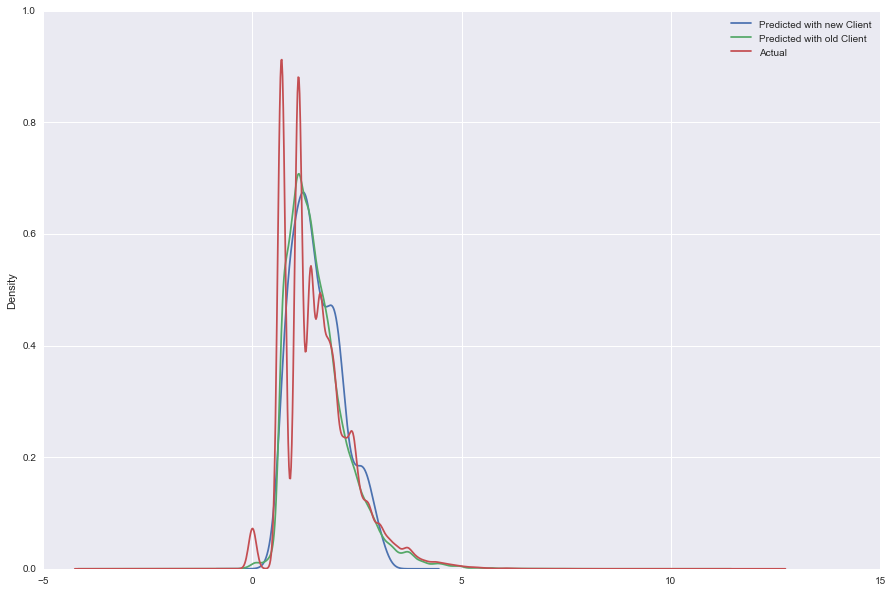

In [20]:
new_client_ids = set(X_test.Cliente_ID.unique()).difference(X_train.Cliente_ID.unique())
preds.loc[X_test.loc[8].Cliente_ID.isin(new_client_ids).values].plot.kde(figsize = (15,10))
print('8 week with new Client:', np.sqrt(mean_squared_error(
                    y_test.loc[8].loc[X_test.loc[8].Cliente_ID.isin(new_client_ids).values], 
                    preds.loc[X_test.loc[8].Cliente_ID.isin(new_client_ids).values])))
print('8 week with old Client:', np.sqrt(mean_squared_error(
                    y_test.loc[8].loc[~X_test.loc[8].Cliente_ID.isin(new_client_ids).values], 
                    preds.loc[~X_test.loc[8].Cliente_ID.isin(new_client_ids).values])))
preds.loc[~X_test.loc[8].Cliente_ID.isin(new_client_ids).values].plot.kde()
y_test.loc[8].plot.kde()
plt.legend(['Predicted with new Client', 'Predicted with old Client', 'Actual'])

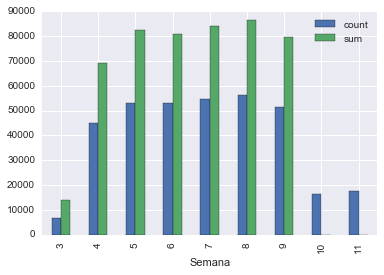

In [16]:
data.replace(np.nan, 0).groupby('Semana').Log_Demanda.agg(['count', 'sum']).plot.bar()

Наблюдений в 10-11 неделе сильно меньше, чем в 8-9. Что отфильтровано?

### Гипотеза1: нам дали только "сложные" точки продаж или маршруты или ...


Agencia_ID only from 10-11 weeks
1.0 rows remain
Train: 0.373992010747
Test whole set: 0.397037905721
Test 8 week: 0.368836650672
Test 9 week: 0.425766645545
Canal_ID only from 10-11 weeks
1.0 rows remain
Train: 0.373992010747
Test whole set: 0.397037905721
Test 8 week: 0.368836650672
Test 9 week: 0.425766645545
Ruta_SAK only from 10-11 weeks
0.999985871782 rows remain
Train: 0.373988438279
Test whole set: 0.397037905721
Test 8 week: 0.368836650672
Test 9 week: 0.425766645545
Cliente_ID only from 10-11 weeks
0.962649700246 rows remain
Train: 0.371264834393
Test whole set: 0.395369967009
Test 8 week: 0.367129235817
Test 9 week: 0.42387337972
Producto_ID only from 10-11 weeks
0.982617582097 rows remain
Train: 0.373409513131
Test whole set: 0.395328298912
Test 8 week: 0.366999614734
Test 9 week: 0.424131439333


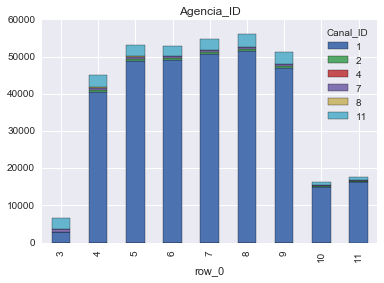

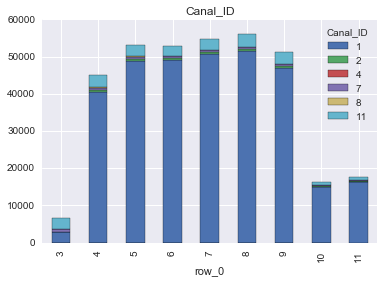

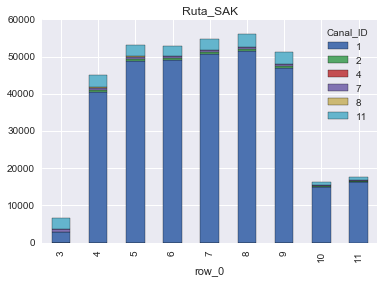

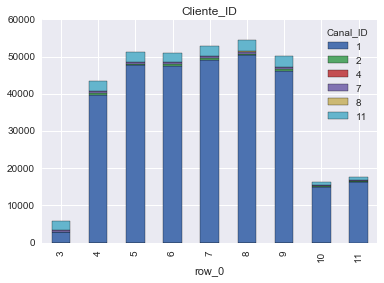

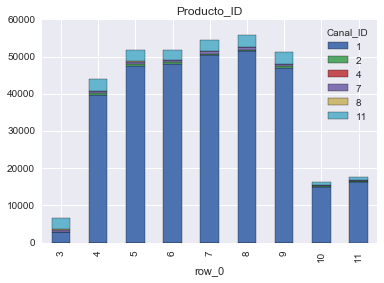

In [53]:

categories = ['Agencia_ID','Canal_ID','Ruta_SAK','Cliente_ID','Producto_ID']

for cat in categories:
    print(cat, 'only from 10-11 weeks')
    elements_10_11 = X_eval[cat].unique()

    X_train_filtered = X_train.loc[X_train[cat].isin(elements_10_11),:]
    y_train_filtered = y_train.loc[X_train[cat].isin(elements_10_11)]
    
    print (y_train_filtered.shape[0]/y_train.shape[0], 'rows remain')

    X_test_filtered = X_test.loc[X_test[cat].isin(elements_10_11),:]
    X_test2_filtered = X_test2.loc[X_test2[cat].isin(elements_10_11),:]
    y_test_filtered = y_test.loc[X_test[cat].isin(elements_10_11)]
    
    pivot = pd.concat([pd.crosstab(X_train_filtered.index, X_train_filtered.Canal_ID),
                   pd.crosstab(X_test_filtered.index, X_test_filtered.Canal_ID),
                   pd.crosstab(X_eval.index, X_eval.Canal_ID)])
    pivot.plot.bar(stacked=True)
    plt.title(cat)

    print('Train:', np.sqrt(mean_squared_error(y_train_filtered, xgb_model.predict(X_train_filtered))))
    preds = pd.Series(xgb_model.predict(X_test_filtered.loc[8]), index=X_test_filtered.loc[8])
    preds2 = pd.Series(xgb_model2.predict(X_test2_filtered.loc[9]), index=X_test2_filtered.loc[9])
    print('Test whole set:', np.sqrt(mean_squared_error(y_test_filtered.loc[[8,9]], np.concatenate([preds, preds2]))))
    print('Test 8 week:', np.sqrt(mean_squared_error(y_test_filtered.loc[8], preds)))
    print('Test 9 week:', np.sqrt(mean_squared_error(y_test_filtered.loc[9], preds2)))

### Гипотеза2: дали "сложные" комбинации, возьмем прямо все комбинации из 10-11 недели и посмотрим их за 8-9 неделю

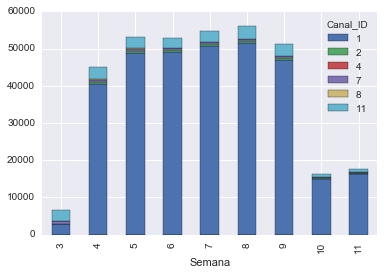

In [41]:
pd.crosstab(data.Semana, data.Canal_ID).plot.bar(stacked=True)

Train: 0.0259158617507 rows remain
Train: 0.101507191296 rows remain


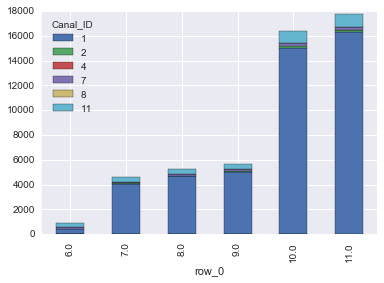

In [45]:
categories = ['Agencia_ID','Canal_ID','Ruta_SAK','Cliente_ID','Producto_ID']

def filter_train_test(categories):
    index_10_11 = X_eval.set_index(categories).index

    tmp = X_train.reset_index()
    tmp['Index'] = np.arange(X_train.shape[0])
    X_train_filtered = tmp.set_index(categories).loc[index_10_11,:].reset_index().drop_duplicates().set_index('Semana')\
                    .rename(columns=dict([('level_%d' % i, cat) for i, cat in enumerate(categories)])).dropna()
    y_train_filtered = y_train.iloc[X_train_filtered.Index]

    print ('Train:', y_train_filtered.shape[0]/y_train.shape[0], 'rows remain')

    tmp = X_test.reset_index()
    tmp['Index'] = np.arange(X_test.shape[0])
    X_test_filtered = tmp.set_index(categories).loc[index_10_11,:].reset_index().drop_duplicates().set_index('Semana')\
                    .rename(columns=dict([('level_%d' % i, cat) for i, cat in enumerate(categories)])).dropna()
    y_test_filtered = y_test.iloc[X_test_filtered.Index]

    print ('Train:', y_test_filtered.shape[0]/y_test.shape[0], 'rows remain')
    return X_train_filtered, y_train_filtered, X_test_filtered, y_test_filtered

X_train_filtered, y_train_filtered, X_test_filtered, y_test_filtered = filter_train_test(categories)

pivot = pd.concat([pd.crosstab(X_train_filtered.index, X_train_filtered.Canal_ID),
                   pd.crosstab(X_test_filtered.index, X_test_filtered.Canal_ID),
                   pd.crosstab(X_eval.index, X_eval.Canal_ID)])
pivot.plot.bar(stacked=True)

In [57]:
import itertools
      
list(itertools.combinations(['1', '2', '3'], 2))

[('1', '2'), ('1', '3'), ('2', '3')]

In [63]:
categories = ['Agencia_ID','Canal_ID','Ruta_SAK','Cliente_ID','Producto_ID']
combinations = list(itertools.combinations(categories, 2))
print(combinations)
for comb in combinations:
    print(comb)
    X_train_filtered, y_train_filtered, X_test_filtered, y_test_filtered = filter_train_test(list(comb))

    pivot = pd.concat([pd.crosstab(X_train_filtered.index, X_train_filtered.Canal_ID),
                       pd.crosstab(X_test_filtered.index, X_test_filtered.Canal_ID),
                       pd.crosstab(X_eval.index, X_eval.Canal_ID)])
    pivot.plot.bar(stacked=True)
    plt.title('+'.join(comb))

[('Agencia_ID', 'Canal_ID'), ('Agencia_ID', 'Ruta_SAK'), ('Agencia_ID', 'Cliente_ID'), ('Agencia_ID', 'Producto_ID'), ('Canal_ID', 'Ruta_SAK'), ('Canal_ID', 'Cliente_ID'), ('Canal_ID', 'Producto_ID'), ('Ruta_SAK', 'Cliente_ID'), ('Ruta_SAK', 'Producto_ID'), ('Cliente_ID', 'Producto_ID')]
('Agencia_ID', 'Canal_ID')


KeyboardInterrupt: 

In [ ]:
print('Train:', np.sqrt(mean_squared_error(y_train_filtered, xgb_model.predict(X_train_filtered))))
preds = pd.Series(xgb_model.predict(X_test_filtered.loc[8]), index=X_test_filtered.loc[8])
preds2 = pd.Series(xgb_model2.predict(X_test2_filtered.loc[9]), index=X_test2_filtered.loc[9])
print('Test whole set:', np.sqrt(mean_squared_error(y_test_filtered.loc[[8,9]], np.concatenate([preds, preds2]))))
print('Test 8 week:', np.sqrt(mean_squared_error(y_test_filtered.loc[8], preds)))
print('Test 9 week:', np.sqrt(mean_squared_error(y_test_filtered.loc[9], preds2)))